# Logistic Regression - Predict Admission


# Problem Understanding
* What factors contribute to acceptance?
* What does a predictive model look like? 

In [1]:
# --- Import Libraries ---
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Put the data in to a DataFrame

In [4]:
# -- Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/ttchuang/dataset/master/gpa_sat.csv")

In [6]:
# -- properties of data -- tells the properties of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   GPA         1000 non-null   float64
 2   SAT         1000 non-null   int64  
 3   Accepted    1000 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 31.4 KB


In [16]:
# -- Exclude irrelevant columns -- (which would be the first column, 'Unnamed: 0', but any columns we don't want)
cols = ['GPA','SAT','Accepted']
data_df = data.loc[:,cols]
data_df.head()

,GPA,SAT,Accepted
0,2.75,811,1
1,3.90,1117,1
2,3.46,1391,1
3,3.20,1015,0
4,2.31,1138,1


In [18]:
# -- Dataframe shape -- no. of rows and no. of columns
data_df.shape

(1000, 3)

In [20]:
#preview of data
data_df.head()

,GPA,SAT,Accepted
0,2.75,811,1
1,3.90,1117,1
2,3.46,1391,1
3,3.20,1015,0
4,2.31,1138,1


## Examine relationships between features

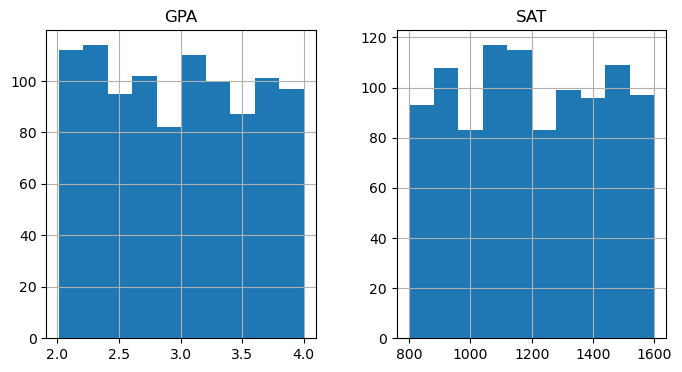

In [30]:
# -- Examine the distribution of variables -- (does not include accepted column, bc its not a variable)
# ':' means "all," ':-1' means retrieve record from index/column 0 to index n-1 from right side, assuming column on right
#    is -1 (returns -2 & -3, or GPA & SAT from right
# figsize is in inches
data_df.iloc[:,:-1].hist(bins=10,figsize=(8,4))
plt.show()

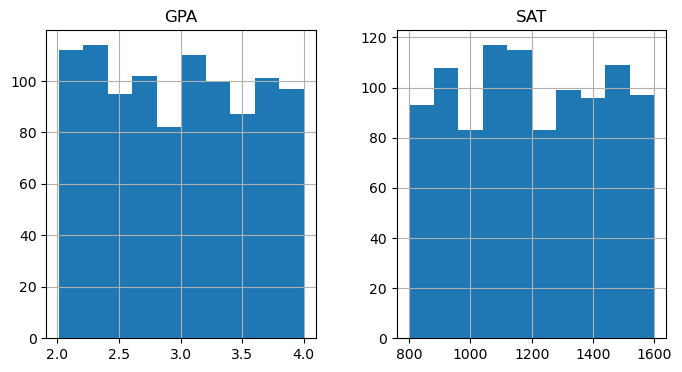

In [32]:
# -- Examine the distribution of variables -- (does not include accepted column, bc its not a variable)
# ':' means "all," '0:2' means retrieve record from index/column 0 to index n-1, or column 1, assuming first column from left is 0
data_df.iloc[:,0:2].hist(bins=10,figsize=(8,4))
plt.show()

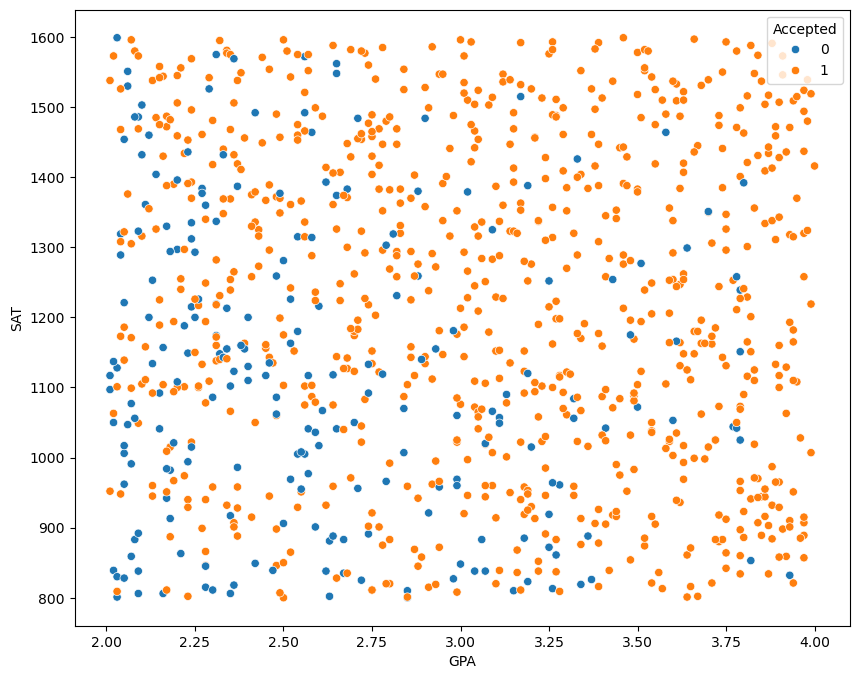

In [34]:
# -- Use DataFrame and Seaborn --
# -- Use two features to preview the groups of outcomes --

%matplotlib inline

plt.figure(figsize=(10,8)) # -- Here figsize(,) is a function to determine the size (inch) of the figure (canvas) 
sns.scatterplot(x=data_df['GPA'],
                y=data_df['SAT'],
                hue=data_df['Accepted']);
# -- the parameter, hue, in seaborn works like a legend --

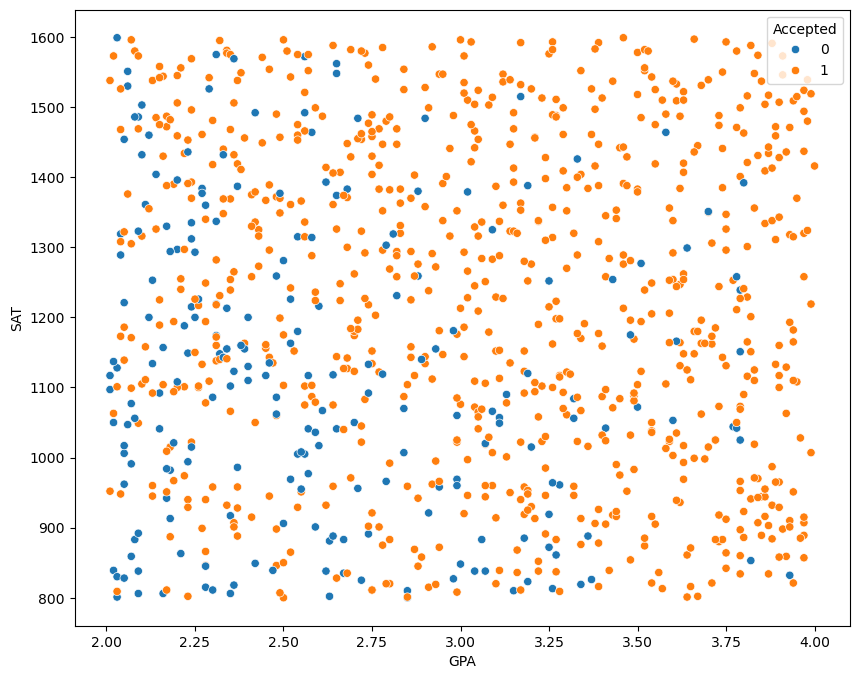

In [38]:
# -- Use DataFrame and Seaborn --
# -- Use two features to preview the groups of outcomes --
# Dr. CHuang wants to change this to pandas

%matplotlib inline

plt.figure(figsize=(10,8)) # -- Here figsize(,) is a function to determine the size (inch) of the figure (canvas) 
sns.scatterplot(x=data_df['GPA'],
                y=data_df['SAT'],
                hue=data_df['Accepted']);
# -- the parameter, hue, in seaborn works like a legend --

# Modeling

## Train the Model using Two Features
* We use two columns, mean radius and mean texture, to fit the model

In [40]:
# -- preview the dataset --
data_df.head()

,GPA,SAT,Accepted
0,2.75,811,1
1,3.90,1117,1
2,3.46,1391,1
3,3.20,1015,0
4,2.31,1138,1


### Extract and Prepare Features
* Features

    * **radius_mean**
    * **texture_mean**

In [42]:
# --- Extract features --
X = data_df.loc[:,['GPA','SAT']]
y = data_df['Accepted']

In [52]:
# --- Split data into training and testing

from sklearn.model_selection import train_test_split


# -- train_test_split() splits data into two groups: One for training the model and 
# -- the other for testing/validating the model. --

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state = 1,
                                                    stratify = data_df['Accepted'])
# -- Here, the parameter, test_size = 0.25, means that we want to have 75% of data for fitting the model and 
# -- 'test_size=0.25' means 25% for testing/validating the model. It is suggested that the training data should be more than 70% of the 
# -- whole dataset. 
# 'stratify' commands equal proportion of variables in testing and training; could create model that is accurate but useless because
# the data is too skewed (accuracy paradox)

X_train.head()

,GPA,SAT
249,3.71,1162
680,3.63,1017
562,2.27,1133
71,2.40,1110
667,2.32,1140


In [54]:
# -- Rescale -- to normalize the data
from sklearn.preprocessing import MinMaxScaler

rescaler = MinMaxScaler()
X_train = rescaler.fit_transform(X_train)
X_test = rescaler.transform(X_test)

### Fit the model 
#### (train model)

In [59]:
# -- import the Logistic Regression classifier --
from sklearn.linear_model import LogisticRegression

# -- Train the model --
x = X_train            # x = X_train[:,:]
y = y_train
log_regress = LogisticRegression(solver = 'liblinear') # -- instantiate an instance of LogisticRegression()
log_regress.fit(X = x, y = y) # -- Fit the model with the training data X and y. 

# --- Print out intercept and coefficient ---
print(log_regress.intercept_)
print(log_regress.coef_)

[-0.63175388]
[[2.67593565 1.62291776]]


### Prediction

In [68]:
# --- Test the Model ---
preds_prob = pd.DataFrame(log_regress.predict_proba(X = X_test))

# --- Assign column names to predictions ---
preds_prob.columns = ['Declined','Accepted']
preds_prob.head()

# -- The class (Accepted or Decline) that has probability greater than 0.5 "wins" --
# -- For example, the first row/case has 0.92 of the probability for malignance and 0.083 for benign. 
# -- So, the diagnosis would be malignant.   
# -- What is the verdict of the second case? Third? --

,Declined,Accepted
0,0.297320,0.702680
1,0.188154,0.811846
2,0.067762,0.932238
3,0.058716,0.941284
4,0.435179,0.564821


In [70]:
preds_prob.tail()

,Declined,Accepted
245,0.443104,0.556896
246,0.122373,0.877627
247,0.094941,0.905059
248,0.278140,0.721860
249,0.123818,0.876182


### Comparison between predicted diagnosis and actual diagnosis

In [73]:
# --- Get the predicted class labels ---
preds = log_regress.predict(X = X_test)
preds_class = pd.DataFrame(preds)
preds_class.columns = ['Prediction']

# --- Actual diagnosis ---
original_result = pd.DataFrame(y_test.values)
original_result.columns = ['Original Result']

# --- Merge the three dataframes together ---
# -- 0: Malignant 
# -- 1: Benign
result = pd.concat([preds_prob, preds_class, original_result], axis = 1)
result.head()

,Declined,Accepted,Prediction,Original Result
0,0.297320,0.702680,1,0
1,0.188154,0.811846,1,0
2,0.067762,0.932238,1,1
3,0.058716,0.941284,1,1
4,0.435179,0.564821,1,1


## Model Performance Evaluation
### Confusion Matrix

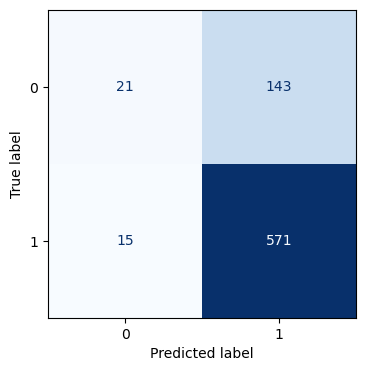

In [77]:
# -- Use ConfusionMatrixDisplay.from_estimator --
# -- The .from_estimator() method is used in the training data --

from sklearn.metrics import ConfusionMatrixDisplay
fig,ax = plt.subplots(figsize=(4,4))
ConfusionMatrixDisplay.from_estimator(log_regress,
                                     X_train,
                                     y_train,
                                     cmap='Blues',
                                     colorbar=False,
                                     ax=ax);


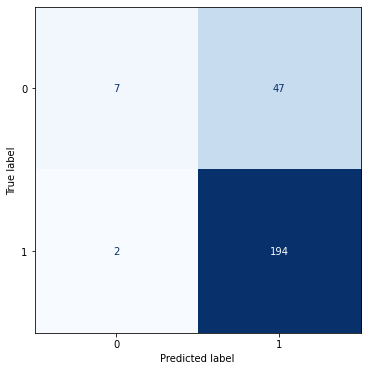

In [17]:
# -- Use ConfusionMatrixDisplay.from_predictions --
# -- The .from_predictions() method is uesd on the testing data --

from sklearn.metrics import ConfusionMatrixDisplay
fig,ax = plt.subplots(figsize=(6,6))

preds_test = log_regress.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test,
                                        preds_test,
                                        cmap='Blues',
                                        colorbar=False,
                                       ax=ax);


#### Accuracy, Recall, Precision, and Other metrics

In [18]:
# --- Accuracy: num of correct predictions divided by the total of predictions

print('--- Accuracy ---')
print(log_regress.score(X = X_test, 
                        y = y_test))

--- Accuracy ---
0.804


In [19]:
# View summary of common classification metrics

from sklearn import metrics
print('--- Metrices ---')
print(metrics.classification_report(y_true = y_test, 
                                    y_pred = preds_test))

--- Metrices ---
              precision    recall  f1-score   support

           0       0.78      0.13      0.22        54
           1       0.80      0.99      0.89       196

    accuracy                           0.80       250
   macro avg       0.79      0.56      0.56       250
weighted avg       0.80      0.80      0.74       250



In [20]:
print(metrics.f1_score(y_test,
                       preds_test))

0.8878718535469108


#### Receiver Operating Characteristic (ROC) Curve
**Note:** 
* The ROC curve is created by plotting the TPR against the FPR at various thrshold settings. 
* Threshold of 0.5: all of those predicted probabilities less than or equal to 0.5 belong to one class, while those greater than 0.5 belong to another class.

In [21]:
# --- find the prediction probabilities using the test set ---
from sklearn.metrics import roc_curve, auc
probs = log_regress.predict_proba(X_test)
preds = probs[:,1]

# --- find the FPR, TPR and threshold ---
fpr, tpr, threshold = roc_curve(y_test, preds_test)
print(fpr)
print(tpr)
print(threshold)

[0.         0.87037037 1.        ]
[0.         0.98979592 1.        ]
[2 1 0]


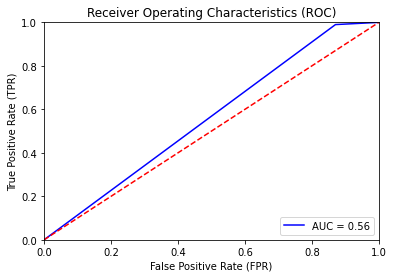

In [22]:
# --- Plot the ROC and Find AUC ---

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,'b',label = 'AUC = %0.2F' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristics (ROC)')
plt.legend(loc = 'lower right')
plt.show()